In [ ]:
!pip install phyelds=5.0.0

In [ ]:
from phyelds.calculus import aggregate
from phyelds.libraries.collect import collect_or
from phyelds.libraries.distances import neighbors_distances
from phyelds.libraries.spreading import distance_to
from phyelds.simulator import Simulator
from phyelds.simulator.deployments import deformed_lattice
from phyelds.simulator.neighborhood import radius_neighborhood
from phyelds.simulator.render import RenderMonitor
from phyelds.simulator.effects import DrawNodes, DrawEdges, RenderConfig, RenderMode
from phyelds.simulator.runner import aggregate_program_runner
from phyelds.libraries.device import sense

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


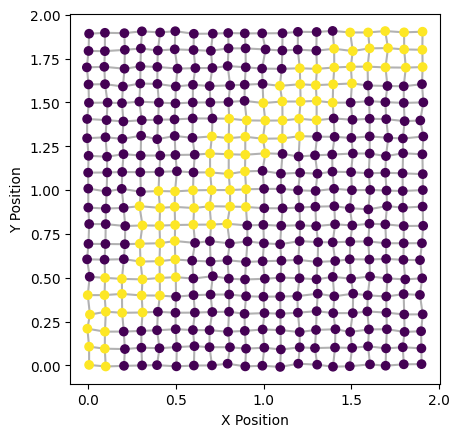

In [3]:
@aggregate
def main():
    """
    Example to use the phyelds library to create a simple simulation
    :return:
    """
    distances = neighbors_distances()
    target_distance = distance_to(sense("target"), distances)
    nodes_in_path = collect_or(target_distance, sense("source"))
    # distance from nodes_in
    distance_from_path = distance_to(nodes_in_path, distances)
    channel = 1.0 if distance_from_path < 0.12 else 0.0
    return channel  # distance_to(leader == 33, distances)

simulator = Simulator()
simulator.environment.set_neighborhood_function(radius_neighborhood(0.12))
deformed_lattice(simulator, 20, 20, 0.1, 0.01)
# put source
for node in simulator.environment.nodes.values():
    node.data = {"source": False, "target": False}
# put a source in the first node
simulator.environment.node_list()[0].data["source"] = True
target = simulator.environment.node_list()[-1]
target.data["target"] = True
# schedule the main function
for node in simulator.environment.nodes.values():
    simulator.schedule_event(0.0, aggregate_program_runner, simulator, 0.1, node, main)
# render
RenderMonitor(
    simulator,
    RenderConfig(
        effects=[DrawEdges(), DrawNodes(color_from="result")],
        mode=RenderMode.SHOW,
        save_as="channel.mp4",
        dt=0.1
    )
)
simulator.run(10)